In [6]:
!pip install numpy


[notice] A new release of pip is available: 23.1.2 -> 23.2
[notice] To update, run: C:\Users\SHRI\AppData\Local\Programs\Python\Python311\python.exe -m pip install --upgrade pip


In [7]:
!pip install pandas


[notice] A new release of pip is available: 23.1.2 -> 23.2
[notice] To update, run: C:\Users\SHRI\AppData\Local\Programs\Python\Python311\python.exe -m pip install --upgrade pip


In [8]:
import numpy as np
import pandas as pd

In [9]:
df = pd.read_csv('spam.csv')

In [10]:
df = pd.read_csv('file_name.csv', engine='python')

FileNotFoundError: [Errno 2] No such file or directory: 'file_name.csv'

In [12]:
df = pd.read_csv('spam.csv', engine='python')



In [13]:
data = pd.read_csv('spam.csv', encoding='utf-8')


In [14]:
df = pd.read_csv('spam.csv', encoding='utf-8')

In [15]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
2228,ham,Those were my exact intentions,NaN,NaN,NaN
1470,ham,Take some small dose tablet for fever,NaN,NaN,NaN
668,ham,Have a good evening! Ttyl,NaN,NaN,NaN
3815,ham,How long does it take to get it.,NaN,NaN,NaN
1311,ham,U r too much close to my heart. If u go away i...,NaN,NaN,NaN


In [16]:
df.shape

(5572, 5)

## 1. Data cleaning

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [18]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [19]:
df.sample(5)

,v1,v2
2775,ham,We confirm eating at esplanade?
3811,ham,Yep then is fine 7.30 or 8.30 for ice age.
3730,ham,Isn't frnd a necesity in life? imagine urself ...
4994,ham,"Just looked it up and addie goes back Monday, ..."
4416,ham,says that he's quitting at least5times a day ...


In [20]:
# renaming the cols
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(5)

,target,text
2084,ham,How are you. Wish you a great semester
1554,ham,Yeah we do totes. When u wanna?
4012,ham,Ok.
1335,ham,"Sometimes we put walls around our hearts,not j..."
3370,ham,Tomorrow i am not going to theatre. . . So i c...


In [21]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [22]:
!pip install sklearn


[notice] A new release of pip is available: 23.1.2 -> 23.2
[notice] To update, run: C:\Users\SHRI\AppData\Local\Programs\Python\Python311\python.exe -m pip install --upgrade pip


In [23]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [24]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 23.2
[notice] To update, run: C:\Users\SHRI\AppData\Local\Programs\Python\Python311\python.exe -m pip install --upgrade pip


In [37]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [38]:
df['target'] = encoder.fit_transform(df['target'])

In [27]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [28]:
# checking for missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [29]:
# check for duplicates
df.duplicated().sum()

403

In [30]:
# remove them
df = df.drop_duplicates(keep='first')

In [31]:
df.duplicated().sum()

0

In [32]:
df.shape

(5169, 2)

In [33]:
#understanding amount of spam and reg msg records in the dataset
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

In [34]:
!pip install matplotlib


[notice] A new release of pip is available: 23.1.2 -> 23.2
[notice] To update, run: C:\Users\SHRI\AppData\Local\Programs\Python\Python311\python.exe -m pip install --upgrade pip


In [35]:
import matplotlib.pyplot as plt

In [36]:
plt.pie(df['target'].value_counts(), lables=['ham','spam'])
plt.show()

TypeError: pie() got an unexpected keyword argument 'lables'

In [ ]:
plt.pie(df['target'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [ ]:
# 88% not spam

In [ ]:
!pip install nltk

In [40]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\SHRI\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [39]:
df['text'].apply(len)

0       111
1        29
2       155
3        49
4        61
       ... 
5567    161
5568     37
5569     57
5570    125
5571     26
Name: text, Length: 5169, dtype: int64

In [41]:
df['num_characters'] = df['text'].apply(len)

In [42]:
df.head()


,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [43]:
# list of each text w of words
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [44]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [45]:
#sentences in each
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [46]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [47]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.978332,18.455794,1.965564
std,58.236795,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [ ]:
#overall analysis of text

In [48]:
#regular messages desc
df[df['target']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459699,17.123782,1.820195
std,56.358868,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [ ]:
#spam msg desc
df[df['target']==1][['num_characters','num_words','num_sentences']].describe()

In [49]:
!pip install seaborn


[notice] A new release of pip is available: 23.1.2 -> 23.2
[notice] To update, run: C:\Users\SHRI\AppData\Local\Programs\Python\Python311\python.exe -m pip install --upgrade pip


In [50]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

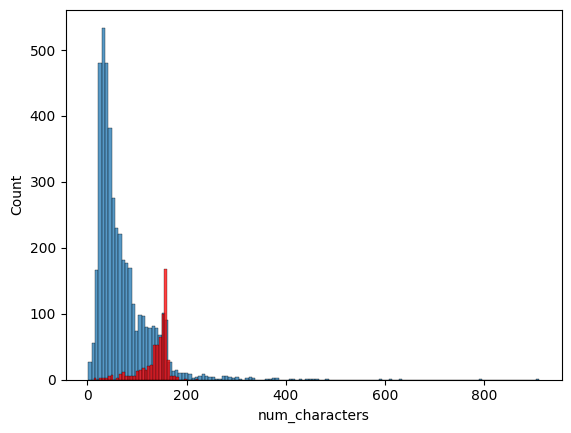

In [51]:
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'],color='red')

C:\Users\SHRI\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


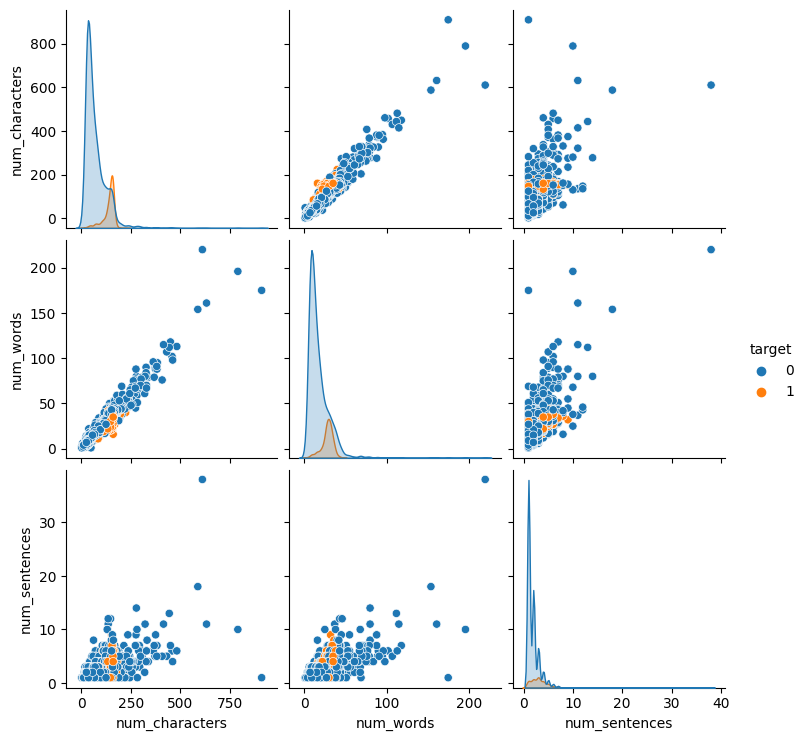

In [52]:
sns.pairplot(df,hue='target')

In [53]:
df.corr()

ValueError: could not convert string to float: 'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5169 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   target          5169 non-null   int64 
 1   text            5169 non-null   object
 2   num_characters  5169 non-null   int64 
 3   num_words       5169 non-null   int64 
 4   num_sentences   5169 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 242.3+ KB


In [55]:
subset_df = df[['target', 'num_characters', 'num_words', 'num_sentences']]
subset_df.corr()

,target,num_characters,num_words,num_sentences
target,1.000000,0.384711,0.262912,0.263939
num_characters,0.384711,1.000000,0.965763,0.624141
num_words,0.262912,0.965763,1.000000,0.679971
num_sentences,0.263939,0.624141,0.679971,1.000000


<Axes: >

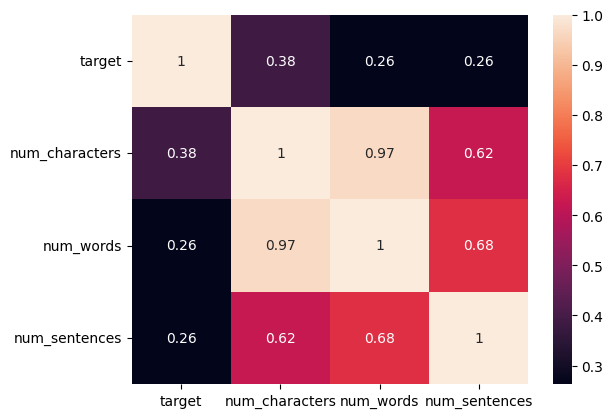

In [56]:
sns.heatmap(subset_df.corr(),annot=True)

In [57]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
            
    return " ".join(y)

In [58]:
transform_text("how did you do the exam?. i found the paper to be pretty easy.")

NameError: name 'stopwords' is not defined

In [59]:
from nltk.corpus import stopwords 

In [60]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\SHRI\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [61]:
import string

In [66]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [67]:
transform_text("how did you do the exam?. i found the paper to be pretty easy.")

'exam found paper pretti easi'

In [68]:
df['transformed_text'] = df['text'].apply(transform_text)

In [70]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [74]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=12,background_color='black')

In [ ]:
!pip install wordcloud

In [73]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=12,background_color='black')

In [75]:
wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

In [76]:
spam_wc=wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

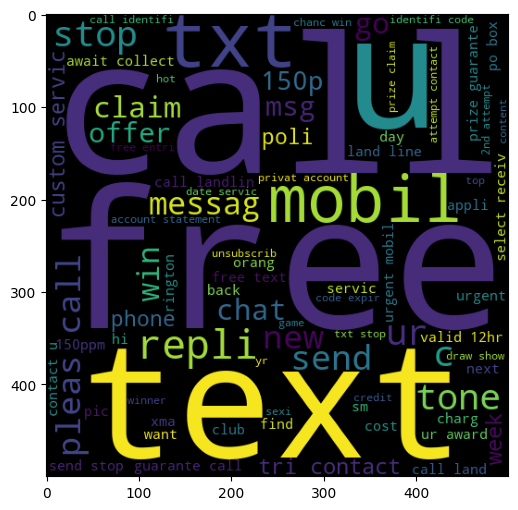

In [77]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [78]:
spam_words = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for w in msg.split():
        spam_words.append(w)

In [79]:
len(spam_words)

9939

In [80]:
from collections import Counter

In [81]:
Counter(spam_words)

Counter({'call': 320,
         'free': 191,
         '2': 155,
         'txt': 141,
         'text': 122,
         'u': 119,
         'ur': 119,
         'mobil': 114,
         'stop': 104,
         'repli': 103,
         'claim': 98,
         '4': 97,
         'prize': 82,
         'get': 74,
         'new': 64,
         'servic': 64,
         'tone': 63,
         'send': 60,
         'urgent': 57,
         'nokia': 57,
         'contact': 56,
         'award': 55,
         'phone': 52,
         'cash': 51,
         'pleas': 51,
         'week': 49,
         'win': 48,
         'c': 45,
         'collect': 45,
         'min': 45,
         'custom': 42,
         'messag': 42,
         'guarante': 42,
         'per': 41,
         'chat': 38,
         'tri': 37,
         'msg': 35,
         'draw': 35,
         'number': 35,
         'cs': 35,
         'show': 33,
         'today': 33,
         'offer': 33,
         'line': 33,
         'go': 32,
         'receiv': 31,
         'want': 3

In [82]:
Counter(spam_words).mostcommon(10)

AttributeError: 'Counter' object has no attribute 'mostcommon'

In [115]:
Counter(spam_words).most_common(30)

[('call', 320),
 ('free', 191),
 ('2', 155),
 ('txt', 141),
 ('text', 122),
 ('u', 119),
 ('ur', 119),
 ('mobil', 114),
 ('stop', 104),
 ('repli', 103),
 ('claim', 98),
 ('4', 97),
 ('prize', 82),
 ('get', 74),
 ('new', 64),
 ('servic', 64),
 ('tone', 63),
 ('send', 60),
 ('urgent', 57),
 ('nokia', 57),
 ('contact', 56),
 ('award', 55),
 ('phone', 52),
 ('cash', 51),
 ('pleas', 51),
 ('week', 49),
 ('win', 48),
 ('c', 45),
 ('collect', 45),
 ('min', 45)]

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 [Text(0, 0, 'call'),
  Text(1, 0, 'free'),
  Text(2, 0, '2'),
  Text(3, 0, 'txt'),
  Text(4, 0, 'text'),
  Text(5, 0, 'u'),
  Text(6, 0, 'ur'),
  Text(7, 0, 'mobil'),
  Text(8, 0, 'stop'),
  Text(9, 0, 'repli'),
  Text(10, 0, 'claim'),
  Text(11, 0, '4'),
  Text(12, 0, 'prize'),
  Text(13, 0, 'get'),
  Text(14, 0, 'new'),
  Text(15, 0, 'servic'),
  Text(16, 0, 'tone'),
  Text(17, 0, 'send'),
  Text(18, 0, 'urgent'),
  Text(19, 0, 'nokia'),
  Text(20, 0, 'contact'),
  Text(21, 0, 'award'),
  Text(22, 0, 'phone'),
  Text(23, 0, 'cash'),
  Text(24, 0, 'pleas'),
  Text(25, 0, 'week'),
  Text(26, 0, 'win'),
  Text(27, 0, 'c'),
  Text(28, 0, 'collect'),
  Text(29, 0, 'min')])

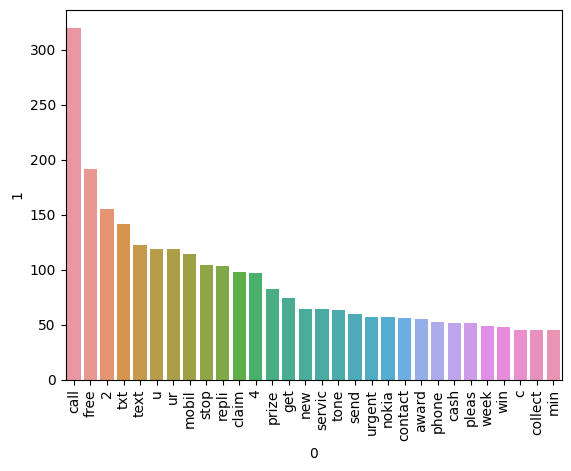

In [116]:
sns.barplot(x=pd.DataFrame(Counter(spam_words).most_common(30))[0],y=pd.DataFrame(Counter(spam_words).most_common(30))[1])
plt.xticks(rotation='vertical')

In [85]:
#to build model vectorize the input
from sklearn.feature_extraction.text import CountVectorizer

In [86]:
cv = CountVectorizer()

In [87]:
X=cv.fit_transform(df['transformed_text']).toarray()

In [88]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [89]:
y = df['target'].values

In [90]:
from sklearn.model_selection import train_test_split


In [91]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [92]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [93]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [94]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8800773694390716
[[792 104]
 [ 20 118]]
0.5315315315315315


In [95]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9642166344294004
[[871  25]
 [ 12 126]]
0.8344370860927153


In [ ]:
#more acc and presicion score


In [96]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


In [ ]:
#more ideal

In [ ]:
#can make the precision score as high as possible
#trying with tf idf

In [97]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [98]:
tfidf = TfidfVectorizer(max_features=3000) #maxfeatures specifies no of words most used n words
x = tfidf.fit_transform(df['transformed_text']).toarray()

In [99]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [100]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [101]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [ ]:
#presicion highest.


In [102]:
from sklearn.neighbors import KNeighborsClassifier

In [103]:
knc = KNeighborsClassifier()

In [104]:
knc.fit(X_train,y_train)
y_pred = knc.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)
precision = precision_score(y_test,y_pred)

In [105]:
accuracy

0.9052224371373307

In [106]:
precision

1.0

In [ ]:
#even though precision is good acc is lower

In [107]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=50, random_state=2)

In [108]:
rfc.fit(X_train,y_train)
y_pred = rfc.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)
precision = precision_score(y_test,y_pred)

In [109]:
accuracy

0.9758220502901354

In [110]:
precision

0.9829059829059829

In [111]:
#precision went down.

In [112]:
#proceeding with mnb

In [113]:
import pickle

In [114]:
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))